# IF3070 Foundations of Artificial Intelligence | Tugas Besar 2

Group Number: 30

Group Members:
- Lydia Gracia (18222035)
- Willhelmina Rachel Silalahi (18222049)
- Favian Izza Diasputra (18222070)
- Ervina Limka (18222100)

## Import Libraries

In [31]:
import pandas as pd
import numpy as np
from urllib.parse import urlparse  
import re
import difflib
from sklearn.model_selection import train_test_split

## Import Dataset

In [32]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

# df = pd.read_csv('https://drive.google.com/uc?id=1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU')
# df.head()
train = pd.read_csv('https://drive.google.com/uc?id=1NjXOVHQ3db9DJUwkFiJ88M8xTZZhiamK')

display(train.head())

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1


In [33]:
# Import the test dataset
test = pd.read_csv('test.csv')

# Display the head of the test dataset
display(test.head())

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,48,80851.txt,https://www.iaee.org,19.0,NaN,12.0,0.0,org,NaN,0.079963,...,1.0,0.0,0.0,1.0,NaN,NaN,13.0,194.0,NaN,65.0
1,68,mw130480.txt,http://www.iran-edi.com,22.0,NaN,16.0,NaN,NaN,0.625000,NaN,...,NaN,NaN,0.0,NaN,0.0,NaN,2.0,0.0,0.0,1.0
2,76,400382.txt,https://www.bistum-chur.ch,25.0,www.bistum-chur.ch,18.0,0.0,ch,0.636364,0.004983,...,NaN,NaN,0.0,1.0,5.0,12.0,18.0,193.0,NaN,196.0
3,155,625297.txt,https://www.numberthreebath.com,30.0,NaN,23.0,NaN,com,1.000000,0.522907,...,0.0,0.0,NaN,NaN,NaN,1.0,10.0,12.0,0.0,11.0
4,167,8123642.txt,https://ipfs.litnet.work/ipfs/bafybeib5jvxytzb...,100.0,ipfs.litnet.work,NaN,0.0,work,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN


# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [34]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

# Split the data
train_set, val_set = train_test_split(
    train,
    test_size=0.2,              # 20% for validation
    stratify=train['label'],    # Ensure the same proportion of '0' and '1'
    random_state=42
)

In [35]:
X_train = train_set.drop(columns='label')
y_train = train_set['label']

X_val = val_set.drop(columns='label')
y_val = val_set['label']

In [36]:
# Display the shapes to verify
print("Original dataset shape:", train.shape)
print("Training set shape:", train_set.shape)
print("Validation set shape:", val_set.shape)
print("")

# Verify the distribution of the target variable
print("Label distribution in training set:\n", train_set['label'].value_counts(normalize=True))
print("")
print("Label distribution in validation set:\n", val_set['label'].value_counts(normalize=True))
print("")

Original dataset shape: (140404, 56)
Training set shape: (112323, 56)
Validation set shape: (28081, 56)

Label distribution in training set:
 label
1    0.924833
0    0.075167
Name: proportion, dtype: float64

Label distribution in validation set:
 label
1    0.924825
0    0.075175
Name: proportion, dtype: float64



# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [37]:
# Check for missing values and calculate their percentages
def missing_data_summary (df):
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100

    # Combine into a DataFrame for better visualization
    missing = pd.DataFrame({
        'Feature': df.columns,
        'Missing Values': missing_values,
        'Percentage (%)': missing_percentage
    }).sort_values(by='Percentage (%)', ascending=False)

    return display(missing)

# Filll missing URL with IsHTTPS and Domain
def fill_missing_url(df):
    mask = df['URL'].isna() & df['IsHTTPS'].notna() & df['Domain'].notna()
    df.loc[mask, 'URL'] = df.loc[mask].apply(lambda row: ('https' if row['IsHTTPS'] == 1 else 'http') + '://' + row['Domain'], axis=1)
    return df

# Fill missing URL with Domain
def fill_missing_url_domain(df):
    mask = df['URL'].isna() & df['Domain'].notna()
    df.loc[mask, 'URL'] = df.loc[mask].apply(lambda row: row['Domain'], axis=1)
    return df

# Fill missing URLLength with URL
def fill_missing_urllength(df):
    mask = df['URLLength'].isna() & df['URL'].notna()
    df.loc[mask, 'URLLength'] = df.loc[mask, 'URL'].apply(lambda x: len(x))
    return df

# Fill missing Domain with URL
def fill_missing_domain(df):
    mask = df['Domain'].isna() & df['URL'].notna()
    df.loc[mask, 'Domain'] = df.loc[mask, 'URL'].apply(
        lambda x: x.split('/')[0] + '//' + x.split('://', 1)[-1].split('/')[0] if '://' in x else x.split('/')[0]
    )
    return df

# Fill misisng TLD values with Domain
def fill_missing_tld(df):
    mask = df['TLD'].isna() & df['Domain'].notna()
    df.loc[mask, 'TLD'] = df.loc[mask, 'Domain'].apply(lambda domain: domain.split('.')[-1] if len(domain.split('.')) > 1 else np.nan)
    return df

# Fill missing IsDomainIP with Domain
def fill_missing_isdomainip(df):
    mask = df['IsDomainIP'].isna() & df['Domain'].notna()
    df.loc[mask, 'IsDomainIP'] = df.loc[mask, 'Domain'].apply(lambda x: int(x.replace('.', '').isdigit()))
    return df

# Fill missing DomainLength with Domain
def fill_missing_domainlength(df):
    mask = df['DomainLength'].isna() & df['Domain'].notna()
    df.loc[mask, 'DomainLength'] = df.loc[mask, 'Domain'].apply(lambda x: len(x))
    return df


In [38]:
def fill_tld_length(df):
    df['TLDLength'] = df['TLD'].apply(lambda x: len(x) if pd.notnull(x) else None)
    return df

def get_obfuscated_chars(url):
    if pd.isnull(url):
        return None
    obfuscated_chars = []
    common_patterns = [r'%[0-9a-fA-F]{2}', r'\\x[0-9a-fA-F]{2}', r'\\u[0-9a-fA-F]{4}']
    for pattern in common_patterns:
        obfuscated_chars.extend(re.findall(pattern, url))
    return len(obfuscated_chars)

def fill_no_of_obfuscated_char(df):
    df['NoOfObfuscatedChar'] = df.apply(
        lambda row: (
            get_obfuscated_chars(row['URL'])
            if pd.notnull(row['URL']) and (
                pd.isnull(row['HasObfuscation']) or pd.isnull(row['ObfuscationRatio'])
            )
            else round(row['ObfuscationRatio'] * row['URLLength'])
            if pd.notnull(row['ObfuscationRatio']) and pd.notnull(row['URLLength'])
            else None
        ),
        axis=1,
    )
    return df

def fill_has_obfuscation(df):
    df['HasObfuscation'] = df['NoOfObfuscatedChar'].apply(
        lambda x: 1 if pd.notnull(x) and x > 0 else None
    )
    return df

def fill_no_of_subdomain(df):
    df['NoOfSubDomain'] = df['NoOfSubDomain'].where(
        ~df['NoOfSubDomain'].isnull(),
        df['Domain'].apply(lambda x: x.count('.') - 1 if pd.notnull(x) else None),
    )
    return df

def fill_no_of_letters_in_url(df):
    def count_letters_excluding_prefix(url):
        if pd.isnull(url):
            return None
        url_without_prefix = re.sub(r'^(https?://)?(www\.)?', '', url)
        return len(re.findall(r'[a-zA-Z]', url_without_prefix))

    df['NoOfLettersInURL'] = df['NoOfLettersInURL'].where(
        ~df['NoOfLettersInURL'].isnull(),
        df['URL'].apply(count_letters_excluding_prefix),
    )
    return df

def fill_no_of_digits_in_url(df):
    def count_digits_excluding_prefix(url):
        if pd.isnull(url):
            return None
        url_without_prefix = re.sub(r'^(https?://)?(www\.)?', '', url)
        return len(re.findall(r'[0-9]', url_without_prefix))

    df['NoOfDegitsInURL'] = df['NoOfDegitsInURL'].where(
        ~df['NoOfDegitsInURL'].isnull(),
        df['URL'].apply(count_digits_excluding_prefix),
    )
    return df

def fill_no_of_equals_in_url(df):
    df['NoOfEqualsInURL'] = df['URL'].apply(
        lambda x: x.count('=') if pd.notnull(x) else None
    )
    return df

def fill_no_of_qmark_in_url(df):
    def count_qmarks(url):
        if pd.isnull(url):
            return None
        url_without_prefix = re.sub(r'^(https?://)?(www\.)?', '', url)
        return url_without_prefix.count('?')

    df['NoOfQMarkInURL'] = df['NoOfQMarkInURL'].where(
        ~df['NoOfQMarkInURL'].isnull(),
        df['URL'].apply(count_qmarks),
    )
    return df

def fill_no_of_ampersand_in_url(df):
    df['NoOfAmpersandInURL'] = df['URL'].apply(
        lambda x: x.count('&') if pd.notnull(x) else None
    )
    return df

def fill_no_of_other_special_chars_in_url(df):
    def count_other_special_chars(url):
        if pd.isnull(url):
            return None
        url_without_prefix = re.sub(r'^(https?://)?(www\.)?', '', url)
        return len(re.findall(r'[^a-zA-Z0-9&?=]', url_without_prefix))

    df['NoOfOtherSpecialCharsInURL'] = df['NoOfOtherSpecialCharsInURL'].where(
        ~df['NoOfOtherSpecialCharsInURL'].isnull(),
        df['URL'].apply(count_other_special_chars),
    )
    return df

def fill_features_from_url(df):
    df = fill_tld_length(df)
    df = fill_no_of_obfuscated_char(df)
    df = fill_has_obfuscation(df)
    df = fill_no_of_subdomain(df)
    df = fill_no_of_letters_in_url(df)
    df = fill_no_of_digits_in_url(df)
    df = fill_no_of_equals_in_url(df)
    df = fill_no_of_qmark_in_url(df)
    df = fill_no_of_ampersand_in_url(df)
    df = fill_no_of_other_special_chars_in_url(df)
    return df

In [39]:
def fill_missing_values(df):
    def safe_mode(series):
        if series.dropna().empty:  
            return 0  
        return series.mode()[0]

    def predict_based_on_correlation(row, correlated_features, threshold=0.5):
        total_score = 0
        count = 0
        for feature in correlated_features:
            if pd.notnull(row[feature]):
                total_score += row[feature]
                count += 1
        if count == 0:  
            return safe_mode(pd.Series(correlated_features))
        return 1 if (total_score / count) >= threshold else 0

    # Fill missing values for each column
    
    # < 0.3 correlation with label
    df['NoOfURLRedirect'] = df['NoOfURLRedirect'].fillna(df['NoOfURLRedirect'].median())
    df['NoOfSelfRedirect'] = df['NoOfSelfRedirect'].fillna(0)
    df['NoOfPopup'] = df['NoOfPopup'].fillna(0)
    df['NoOfiFrame'] = df['NoOfiFrame'].fillna(0)
    df['HasExternalFormSubmit'] = df['HasExternalFormSubmit'].fillna(safe_mode(df['HasExternalFormSubmit']))
    df['HasPasswordField'] = df['HasPasswordField'].fillna(safe_mode(df['HasPasswordField']))
    df['Bank'] = df['Bank'].fillna(0)
    df['Crypto'] = df['Crypto'].fillna(0)
    df['NoOfImage'] = df['NoOfImage'].fillna(df['NoOfImage'].median())
    df['NoOfCSS'] = df['NoOfCSS'].fillna(df['NoOfCSS'].median())
    df['NoOfEmptyRef'] = df['NoOfEmptyRef'].fillna(0)
    df['NoOfExternalRef'] = df['NoOfExternalRef'].fillna(df['NoOfExternalRef'].median())

    # < 0.5 correlation with label
    df['Robots'] = df['Robots'].fillna(safe_mode(df['Robots']))
    df['Pay'] = df['Pay'].fillna(safe_mode(df['Pay']))
    df['NoOfJS'] = df['NoOfJS'].fillna(df['NoOfJS'].median())
    df['NoOfSelfRef'] = df['NoOfSelfRef'].fillna(0)
    df['HasFavicon'] = df['HasFavicon'].fillna(safe_mode(df['HasFavicon'])) 

    # >= 0.45 correlation with label, use correlated variables for imputation
    df['HasSocialNet'] = df['HasSocialNet'].fillna(safe_mode(df['HasSocialNet']))
    df['HasHiddenFields'] = df['HasHiddenFields'].fillna(safe_mode(df['HasHiddenFields']))
    df['HasSubmitButton'] = df['HasSubmitButton'].fillna(safe_mode(df['HasSubmitButton']))
    df['HasCopyrightInfo'] = df['HasCopyrightInfo'].fillna(safe_mode(df['HasCopyrightInfo']))
    df['HasDescription'] = df['HasDescription'].fillna(safe_mode(df['HasDescription']))
    df['IsResponsive'] = df['IsResponsive'].fillna(safe_mode(df['IsResponsive'])) 
    
    return df

In [42]:
def fill_missing_isHTTPS(df):
    mask = df['IsHTTPS'].isna() & df['URL'].notna()
    df.loc[mask, 'IsHTTPS'] = df.loc[mask].apply(lambda x: 1 if isinstance(x, str) and x.startswith('https') else 0)
    return df

def fill_missing_hasTitle(df):
    mask = df['HasTitle'].isna()
    df.loc[mask, 'HasTitle'] = df.loc[mask].apply(
        lambda row: 0 if pd.isna(row['Title']) else 1, axis=1)
    return df

def fill_missing_title(df):
    def extract_domain_name(domain):
        if pd.isna(domain):
            return np.nan
        domain = domain.replace('http://', '').replace('https://', '').replace('www.', '')
        return domain.split('.')[0] 

    def fill_title(row):
        if pd.isna(row['Title']) and row['DomainTitleMatchScore'] == 100.0:
            return extract_domain_name(row['Domain'])
        elif row['DomainTitleMatchScore'] == 0.0:
            return row['Title']
        else:
            return row['Title'] 
    
    df['Title'] = df.apply(fill_title, axis=1)
    return df

def fill_missing_domaintitle(df):
    def extract_domain(domain):
        if pd.isna(domain) or domain == '':
            return ''
        
        try:
            parsed_domain = urlparse(domain)
            domain = parsed_domain.netloc.replace('www.', '')
            
            if not domain and parsed_domain.path:
                domain = parsed_domain.path.strip('/').split('/')[0]
            
            domain = re.sub(r'\.(com|org|net|edu|gov|io|co|info)$', '', domain)
            
            return domain.lower()
        except Exception as e:
            print(f"Error extracting domain: {domain}, Error: {e}")
            return ''

    def clean_text(text):
        if pd.isna(text):
            return ''
        
        text = str(text).lower()
        text = re.sub(r'[^a-z0-9]', '', text)
        
        return text

    def advanced_domain_title_match(domain, title):
        cleaned_domain = extract_domain(domain)
        cleaned_title = clean_text(title)
        
        if not cleaned_domain or not cleaned_title:
            return np.nan
        
        # Define multiple strategies for matching domain and title
        strategies = [
            (lambda d, t: 100 if d in t else 0, 0.4),  # Exact match (40% weight)
            (lambda d, t: difflib.SequenceMatcher(None, d, t).ratio() * 100, 0.3),  # Similarity ratio (30%)
            (lambda d, t: len(set(d) & set(t)) / len(set(d+t)) * 100 if d and t else 0, 0.2),  # Shared characters (20%)
            (lambda d, t: 50 if any(char in t for char in d) else 0, 0.1)  # Partial character match (10%)
        ]
        
        total_score = 0
        for strategy, weight in strategies:
            try:
                score = strategy(cleaned_domain, cleaned_title)
                total_score += score * weight
            except Exception as e:
                print(f"Error in strategy: {e}")
        
        return min(max(total_score, 0), 100)

    def handle_domain_title_match_score(df):
        df_copy = df.copy()
        
        # Mask rows where DomainTitleMatchScore is missing
        mask_missing = df_copy['DomainTitleMatchScore'].isna()
    
        # Safe calculation of match score
        def safe_match_calculation(row):
            try:
                score = advanced_domain_title_match(row['Domain'], row['Title'])
                return score if not np.isnan(score) else 0
            except Exception as e:
                print(f"Error calculating match: {e}")
                return 0
        
        # Update only rows with missing DomainTitleMatchScore
        df_copy.loc[mask_missing, 'DomainTitleMatchScore'] = df_copy.loc[mask_missing].apply(
            safe_match_calculation, 
            axis=1
        )

        return df_copy

    # Process the DataFrame
    df_processed = handle_domain_title_match_score(df)
    return df_processed

def fill_missing_urltitle(df):
    def extract_url(url):
        if pd.isna(url) or url == '':
            return ''
        
        try:
            parsed_url = urlparse(url)
            url = parsed_url.netloc.replace('www.', '')
            
            if not url and parsed_url.path:
                url = parsed_url.path.strip('/').split('/')[0]
            
            url = re.sub(r'\.(com|org|net|edu|gov|io|co|info)$', '', url)
            
            return url.lower()
        except Exception as e:
            print(f"Error extracting URL: {url}, Error: {e}")
            return ''

    def clean_text(text):
        if pd.isna(text):
            return ''
        
        text = str(text).lower()
        
        text = re.sub(r'[^a-z0-9]', '', text)
        
        return text

    def advanced_url_title_match(url, title):
        cleaned_url = extract_url(url)
        cleaned_title = clean_text(title)
        
        if not cleaned_url or not cleaned_title:
            return np.nan
       
        strategies = [
            (lambda u, t: 100 if u in t else 0, 0.4),
            
            (lambda u, t: difflib.SequenceMatcher(None, u, t).ratio() * 100, 0.3),
            
            (lambda u, t: len(set(u) & set(t)) / len(set(u+t)) * 100 if u and t else 0, 0.2),
            
            (lambda u, t: 50 if any(char in t for char in u) else 0, 0.1)
        ]
       
        total_score = 0
        for strategy, weight in strategies:
            try:
                score = strategy(cleaned_url, cleaned_title)
                total_score += score * weight
            except Exception as e:
                print(f"Error in strategy: {e}")
       
        return min(max(total_score, 0), 100)

    def handle_url_title_match_score(df):
        df_copy = df.copy()
        
        mask_missing = df_copy['URLTitleMatchScore'].isna()
    
        def safe_match_calculation(row):
            try:
                score = advanced_url_title_match(row['URL'], row['Title'])
                return score if not np.isnan(score) else 0
            except Exception as e:
                print(f"Error calculating match: {e}")
                return 0
        
        df_copy.loc[mask_missing, 'URLTitleMatchScore'] = df_copy.loc[mask_missing].apply(
            safe_match_calculation, 
            axis=1
        )

        return df_copy

    df_processed = handle_url_title_match_score(df)
    
    return df_processed

def fill_tldlegitimateprob(df):
    tld_mode_map = df.groupby('TLD')['TLDLegitimateProb'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).to_dict()
    df['TLDLegitimateProb'] = df.apply(lambda row: tld_mode_map[row['TLD']] if pd.isna(row['TLDLegitimateProb']) and row['TLD'] in tld_mode_map else row['TLDLegitimateProb'], axis=1)
    return df

##### Domain Imputer Pipeline

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

class DomainImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = fill_missing_url(X)
        X = fill_missing_url_domain(X)
        X = fill_missing_urllength(X)
        X = fill_missing_domain(X)
        X = fill_missing_tld(X)
        X = fill_missing_isdomainip(X)
        X = fill_missing_domainlength(X)

        X = fill_features_from_url(X)

        X = fill_missing_isHTTPS(X)
        X = fill_missing_hasTitle(X)
        X = fill_missing_title(X)
        X = fill_missing_domaintitle(X)
        X = fill_missing_urltitle(X)

        X = fill_missing_values(X)
        
        X = fill_tldlegitimateprob(X)
        return X

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, method='iqr', threshold=3):
        self.method = method
        self.threshold = threshold

    def fit(self, X, y=None):
        X_df = pd.DataFrame(X)
        if self.method == 'zscore':
            self.mean = X_df.mean()
            self.std = X_df.std()
        elif self.method == 'iqr':
            self.q25 = X_df.quantile(0.25)
            self.q75 = X_df.quantile(0.75)
            self.iqr = self.q75 - self.q25
        return self

    def transform(self, X):
        X_df = pd.DataFrame(X)
        if self.method == 'zscore':
            X_transformed = X_df.clip(lower=self.mean - self.threshold * self.std, upper=self.mean + self.threshold * self.std, axis=1)
        elif self.method == 'iqr':
            lower_bound = self.q25 - 1.5 * self.iqr
            upper_bound = self.q75 + 1.5 * self.iqr
            X_transformed = X_df.clip(lower=lower_bound, upper=upper_bound, axis=1)
        return X_transformed.values

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [14]:
def remove_duplicates(X):
    return X.drop_duplicates()

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [47]:
def drop_unnecessary_columns(df):
    return df.drop(columns=['URL', 'Domain', 'Title'])

def add_is_shortened_column(self):
        shorteners = [
            "bit.ly", "tinyurl.com", "rebrandly.com", "short.io", "t2mio.com",
            "bl.ink", "is.gd", "ow.ly", "cutt.ly", "shrtco.de", "itny.cc",
            "adf.ly", "tiny.cc", "shorte.st", "yourls.org"
        ]

        def contains_shortener(text):
            if pd.isna(text):
                return False
            return any(shortener in text for shortener in shorteners)

        is_shortened = self[['URL', 'Domain']].apply(
            lambda row: contains_shortener(row['URL']) or contains_shortener(row['Domain']), axis=1
        )

        self['IsShortened'] = is_shortened.astype(float)
        return self

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA

class PCAReduction(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = PCA(n_components=0.95)

    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self
    
    def transform(self, X):
        return self.scaler.transform(X)

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = add_is_shortened_column(X)
        X = drop_unnecessary_columns(X)
        return X        

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [16]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, StandardScaler

class Standardization(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self
    
    def transform(self, X):
        return self.scaler.transform(X)

class Normalization(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = MinMaxScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self

    def transform(self, X):
        X_scaled = self.scaler.transform(X)
        return pd.DataFrame(X_scaled, columns=X.columns)

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class CustomOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, handle_unknown="ignore", sparse_output=False):
        self.handle_unknown = handle_unknown
        self.sparse_output = sparse_output
        self.encoder = OneHotEncoder(handle_unknown=self.handle_unknown, sparse_output=self.sparse_output)

    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self

    def transform(self, X):
        return self.encoder.transform(X)

    def get_feature_names_out(self, input_features=None):
        return self.encoder.get_feature_names_out(input_features)

In [49]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import spmatrix

class Top5TLDOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, top_n=5, column_name='TLD', sparse_output=False, handle_unknown='ignore'):
        self.top_n = top_n
        self.column_name = column_name
        self.sparse_output = sparse_output
        self.handle_unknown = handle_unknown
        self.encoder = OneHotEncoder(sparse_output=sparse_output, handle_unknown=handle_unknown)
        
    def _ensure_dataframe(self, X):
        if isinstance(X, np.ndarray):
            return pd.DataFrame(X, columns=[self.column_name])
        return X

    def fit(self, X, y=None):
        X = self._ensure_dataframe(X)
        tld_counts = X[self.column_name].value_counts()
        self.top_tlds = tld_counts.nlargest(self.top_n).index.tolist()
        X_transformed = X[self.column_name].apply(lambda x: x if x in self.top_tlds else 'others')
        self.encoder.fit(X_transformed.to_frame())
        return self

    def transform(self, X):
        X = self._ensure_dataframe(X)
        X_transformed = X[self.column_name].apply(lambda x: x if x in self.top_tlds else 'others')
        encoded = self.encoder.transform(X_transformed.to_frame())
        
        # Handle both sparse and dense outputs
        encoded_array = encoded.toarray() if isinstance(encoded, spmatrix) else encoded
        
        encoded_df = pd.DataFrame(
            encoded_array,
            columns=self.get_feature_names_out(),
            index=X.index
        )
        
        return encoded_array if isinstance(X, np.ndarray) else encoded_df

    def get_feature_names_out(self, input_features=None):
        return self.encoder.get_feature_names_out(input_features=[self.column_name])

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE

class CustomSMOTE(BaseEstimator, TransformerMixin):
    def __init__(self, sampling_strategy='auto', random_state=42):
        self.smote = SMOTE(sampling_strategy=sampling_strategy, random_state=random_state)

    def fit(self, X, y=None):
        self.smote.fit(X, y)
        return self

    def transform(self, X, y=None):
        X_resampled, y_resampled = self.smote.fit_resample(X, y)
        return X_resampled, y_resampled

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.under_sampling import RandomUnderSampler

class CustomUnderSampler(BaseEstimator, TransformerMixin):
    def __init__(self, sampling_strategy='auto', random_state=42):
        self.undersampler = RandomUnderSampler(
            sampling_strategy=sampling_strategy, 
            random_state=random_state
        )
    
    def fit(self, X, y=None):
        self.undersampler.fit(X, y)
        return self
    
    def transform(self, X, y=None):
        X_resampled, y_resampled = self.undersampler.fit_resample(X, y)
        return X_resampled, y_resampled

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [22]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [23]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

Pipelining will be compiled on each model for practicality and freedom to choose the pipeline based on model characteristics.

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `label`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

In [63]:
from sklearn.pipeline import Pipeline

domain_imputer_pipeline = Pipeline([
    ('imputer', DomainImputer()),
    ('feature_engineering', FeatureEngineering())
])

In [51]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Domain imputer pipeline
X_train_inputed = domain_imputer_pipeline.fit_transform(X_train)
X_val_inputed = domain_imputer_pipeline.transform(X_val)

## A. KNN

#### Sklearn

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB

# Define column types
continuous_features = ['URLLength', 'DomainLength', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']
categorical_features = ['TLD']
boolean_features = ['IsShortened', 'IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'Robots', 'IsResponsive', 'HasDescription',  'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo']

# Continuous features pipeline
continuous_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('outlier', OutlierHandler(method='iqr')),
    ('scaler', StandardScaler())
])

# Categorical features pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', Top5TLDOneHotEncoder(top_n=5, sparse_output=False, handle_unknown='ignore'))
])

# Boolean features pipeline
boolean_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Combine all feature preprocessing
preprocessor = ColumnTransformer([
    ('continuous', continuous_pipeline, continuous_features),
    ('categorical', categorical_pipeline, categorical_features),
    ('boolean', boolean_pipeline, boolean_features)
])

In [ ]:
from sklearn.metrics import classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from fancyimpute import KNN, IterativeImputer 
import joblib
import warnings
from sklearn.metrics import classification_report

warnings.simplefilter(action='ignore', category=FutureWarning)

# Final pipeline for sklearn
final_pipeline_sklearn = ImbPipeline([
    ('preprocessor', preprocessor),
    # ('pca', PCA(n_components=0.95)),  # Keep 95% of variance
    # ('smote', SMOTE(random_state=42)),
])

# Define distance metrics to evaluate
distance_metrics = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']

# Loop through metrics
for metric in distance_metrics:
    print(f"Testing KNN with metric: {metric}")
    
    # Initialize and train KNN
    X_train_preprocessed = final_pipeline_sklearn.fit_transform(X_train_inputed)
    X_val_preprocessed = final_pipeline_sklearn.transform(X_val_inputed)
    
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train_preprocessed, y_train)
    
    # Validate the model
    y_val_pred = knn.predict(X_val_preprocessed)
    print(f"Validation Metrics for {metric}:")
    print(classification_report(y_val, y_val_pred))
    val_f1_score = f1_score(y_val, y_val_pred, average='macro')
    print(f"Validation F1 Score (Macro) for {metric}: {val_f1_score:.4f}\n")

Testing KNN with metric: euclidean
Validation Metrics for euclidean:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83      2111
           1       0.98      1.00      0.99     25970

    accuracy                           0.98     28081
   macro avg       0.98      0.86      0.91     28081
weighted avg       0.98      0.98      0.98     28081

Validation F1 Score (Macro) for euclidean: 0.9104

Testing KNN with metric: manhattan
Validation Metrics for manhattan:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      2111
           1       0.99      1.00      0.99     25970

    accuracy                           0.99     28081
   macro avg       0.98      0.91      0.94     28081
weighted avg       0.99      0.99      0.98     28081

Validation F1 Score (Macro) for manhattan: 0.9436

Testing KNN with metric: minkowski
Validation Metrics for minkowski:
              precision    recall  f1

#### Scratch

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from knn import KNN  
from sklearn.metrics import classification_report
import joblib

# Dimensionality Reduction
columns_to_keep = ["id", "DegitRatioInURL", "NoOfOtherSpecialCharsInURL", "DomainTitleMatchScore"]
X_train_sample = X_train[columns_to_keep].head(500)
y_train_sample = y_train.head(500)
X_val_sample = X_val[columns_to_keep].head(500)
y_val_sample = y_val.head(500)

# Create the full pipeline
final_pipeline_scratch = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", MinMaxScaler()),
    ("classifier", KNN(n_neighbors=1, metric="manhattan"))
])

# Fit the pipeline
final_pipeline_scratch.fit(X_train_sample, y_train_sample)

# Predict using the pipeline
predictions_test = final_pipeline_scratch.predict(X_val_sample)

# Print the classification report
print(classification_report(y_val_sample, predictions_test))

# Save model
joblib.dump(final_pipeline_scratch, 'knn_manhattan.joblib')

              precision    recall  f1-score   support

           0       0.45      0.42      0.43        50
           1       0.94      0.94      0.94       450

    accuracy                           0.89       500
   macro avg       0.69      0.68      0.69       500
weighted avg       0.89      0.89      0.89       500



['knn_manhattan.joblib']

Karena keterbatasan resource, implementasi KNN from scratch dibatasi hanya menggunakan beberapa fitur yang paling relevan saja dan nya sebagian kecil (500 data) dari training dan validation dataset.

Pemilihan fitur:
- Fitur yang paling berkorelasi negatif dengan label, seperti "DegitRatioInURL", "NoOfOtherSpecialCharsInURL", dalam upaya untuk mengenali data berlabel 0 dengan lebih baik.
- Fitur yang berkorelasi positif dengan label, "DomainTitleMatchScore".

## B. Naive Bayes

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.naive_bayes import GaussianNB

# Define column types
continuous_features = ['URLLength', 'DomainLength', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']
categorical_features = ['TLD']
boolean_features = ['IsShortened', 'IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'Robots', 'IsResponsive', 'HasDescription',  'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo']

domain_imputer_pipeline = Pipeline([
    ('imputer', DomainImputer())
])

# Continuous features pipeline
continuous_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('outlier', OutlierHandler(method='iqr')),
    ('scaler', MinMaxScaler())
])

# Categorical features pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', Top5TLDOneHotEncoder(top_n=5, sparse_output=False, handle_unknown='ignore'))
])

# Boolean features pipeline
boolean_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Combine all feature preprocessing
preprocessor = ColumnTransformer([
    ('continuous', continuous_pipeline, continuous_features),
    ('categorical', categorical_pipeline, categorical_features),
    ('boolean', boolean_pipeline, boolean_features)
])

#### Sklearn

In [57]:
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

warnings.simplefilter(action='ignore', category=FutureWarning)

# Final pipeline for sklearn
final_pipeline_sklearn = ImbPipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),  # Keep 95% of variance
    # ('smote', SMOTE(random_state=42)),
    ('classifier', GaussianNB())
])

final_pipeline_sklearn.fit(X_train_inputed, y_train)
predictions_sklearn = final_pipeline_sklearn.predict(X_val_inputed)

# Generate the classification report
report_sklearn = classification_report(y_val, predictions_sklearn)
print(report_sklearn)

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      2111
           1       0.98      0.99      0.98     25970

    accuracy                           0.97     28081
   macro avg       0.91      0.88      0.89     28081
weighted avg       0.97      0.97      0.97     28081



#### Scratch

In [58]:
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from naive_bayes import GaussianNaiveBayes
from joblib import dump

warnings.simplefilter(action='ignore', category=FutureWarning)

# Final pipeline for scratch
final_pipeline_scratch = ImbPipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.95)),  # Keep 95% of variance
    # ('smote', SMOTE(random_state=42)),
    ('classifier', GaussianNaiveBayes(var_smoothing=1e-8))
])

final_pipeline_scratch.fit(X_train_inputed, y_train)
predictions_scratch = final_pipeline_scratch.predict(X_val_inputed)

# Generate the classification report
report_scratch = classification_report(y_val, predictions_scratch)
print(report_scratch)

# Save the entire pipeline
dump(final_pipeline_scratch, 'naive_bayes_pipeline.joblib')

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      2111
           1       0.98      0.99      0.98     25970

    accuracy                           0.97     28081
   macro avg       0.91      0.88      0.89     28081
weighted avg       0.97      0.97      0.97     28081



['naive_bayes_pipeline.joblib']

## C. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

#### Naive Bayes: Explore var_smoothing & Cross Validation

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

# K-Fold CV
def stratified_kfold_cv(X, y, model, n_splits=5, random_state=42):
    # Initialize stratified k-fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Convert y to numpy array if it's a pandas Series
    y_numpy = y.values if hasattr(y, 'values') else y
    
    # Store metrics for each fold
    fold_metrics = []
    
    # Perform k-fold cross validation
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y_numpy), 1):
        # Split data
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y_numpy[train_idx], y_numpy[val_idx]
        
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_val)
        
        # Get metrics
        report = classification_report(y_val, y_pred, output_dict=True)
        
        # Store metrics for this fold
        fold_metrics.append({
            'fold': fold,
            'accuracy': report['accuracy'],
            'macro_avg_f1': report['macro avg']['f1-score'],
            'weighted_avg_f1': report['weighted avg']['f1-score'],
            'class_0_f1': report['0']['f1-score'],
            'class_1_f1': report['1']['f1-score']
        })
        
        # Print fold results
        # print(f"\nFold {fold} Results:")
        # print(classification_report(y_val, y_pred))

    # Calculate average metrics across folds
    avg_metrics = {
        'accuracy': np.mean([m['accuracy'] for m in fold_metrics]),
        'macro_avg_f1': np.mean([m['macro_avg_f1'] for m in fold_metrics]),
        'weighted_avg_f1': np.mean([m['weighted_avg_f1'] for m in fold_metrics]),
        'class_0_f1': np.mean([m['class_0_f1'] for m in fold_metrics]),
        'class_1_f1': np.mean([m['class_1_f1'] for m in fold_metrics])
    }
    
    # # Print average results
    # print("\nAverage Metrics Across All Folds:")
    # print(f"Accuracy: {avg_metrics['accuracy']:.3f}")
    # print(f"Macro Avg F1: {avg_metrics['macro_avg_f1']:.3f}")
    # print(f"Weighted Avg F1: {avg_metrics['weighted_avg_f1']:.3f}")
    # print(f"Class 0 F1: {avg_metrics['class_0_f1']:.3f}")
    # print(f"Class 1 F1: {avg_metrics['class_1_f1']:.3f}")

    # Plot the metrics
    plot_metrics(fold_metrics, avg_metrics)

    return fold_metrics, avg_metrics

def plot_metrics(fold_metrics, avg_metrics):
    """
    Plot F1 and accuracy metrics for each fold and average metrics.
    
    Args:
        fold_metrics: List of dictionaries containing metrics for each fold
        avg_metrics: Dictionary containing average metrics across all folds
    """
    folds = [m['fold'] for m in fold_metrics]
    accuracy = [m['accuracy'] for m in fold_metrics]
    macro_avg_f1 = [m['macro_avg_f1'] for m in fold_metrics]
    weighted_avg_f1 = [m['weighted_avg_f1'] for m in fold_metrics]

    plt.figure(figsize=(14, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(folds, accuracy, marker='o', label='Accuracy')
    plt.axhline(y=avg_metrics['accuracy'], color='r', linestyle='--', label='Avg Accuracy')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per Fold')
    plt.legend()

    # Plot F1 scores
    plt.subplot(1, 2, 2)
    plt.plot(folds, macro_avg_f1, marker='o', label='Macro Avg F1')
    plt.plot(folds, weighted_avg_f1, marker='o', label='Weighted Avg F1')
    plt.axhline(y=avg_metrics['macro_avg_f1'], color='r', linestyle='--', label='Avg Macro F1')
    plt.axhline(y=avg_metrics['weighted_avg_f1'], color='g', linestyle='--', label='Avg Weighted F1')
    plt.xlabel('Fold')
    plt.ylabel('F1 Score')
    plt.title('F1 Score per Fold')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
whole_X_train = train.drop(columns=["label"])
whole_y_train = train["label"]

whole_X_train_inputted = domain_imputer_pipeline.fit_transform(whole_X_train)


Fold 1 Results:

Fold 2 Results:

Fold 3 Results:

Fold 4 Results:

Fold 5 Results:


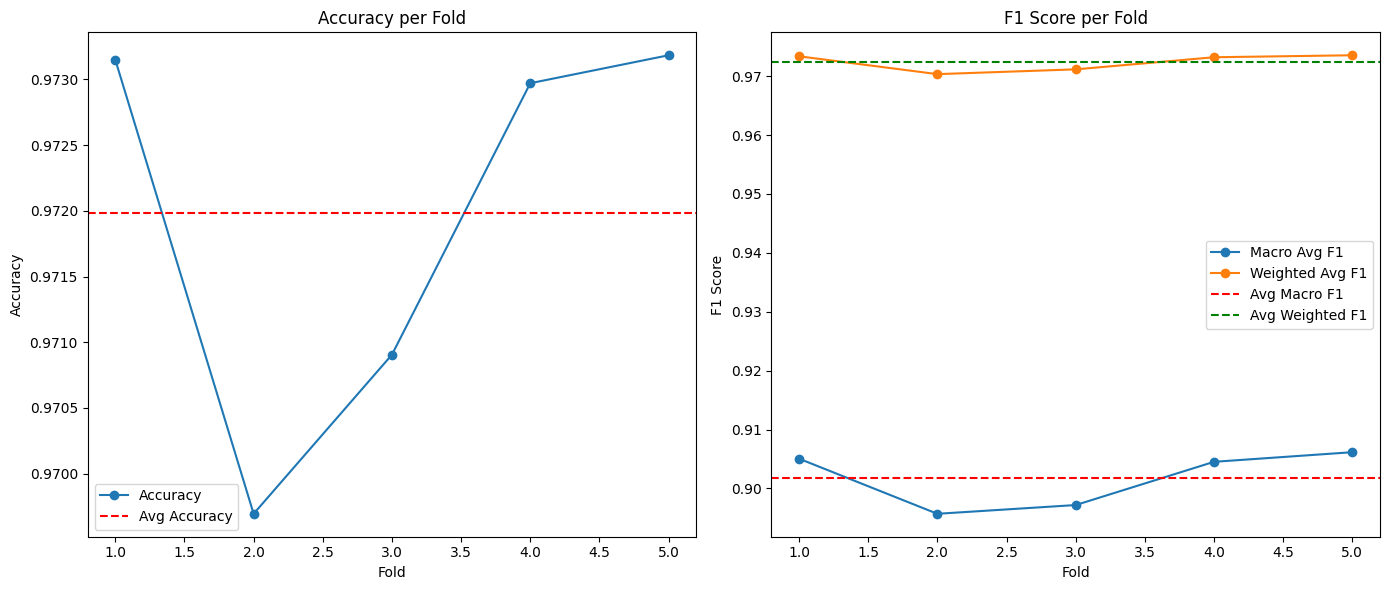

In [ ]:
fold_metrics, avg_metrics = stratified_kfold_cv(whole_X_train_inputted, whole_y_train, final_pipeline_scratch, n_splits=5)

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt

def test_var_smooth_values(X, y, var_smooth_values, n_splits=5, random_state=42):
    """
    Test different var_smooth values for GaussianNB using k-fold cross validation
    
    Args:
        X: Features DataFrame
        y: Target Series or array
        var_smooth_values: List or array of var_smooth values to test
        n_splits: Number of folds for cross validation
        random_state: Random seed for reproducibility
        
    Returns:
        DataFrame with results for each var_smooth value
    """
    results = []
    
    for var_smooth in var_smooth_values:
        # Initialize model with current var_smooth
        model = GaussianNB(var_smoothing=var_smooth)
        
        # Perform cross validation
        fold_metrics, avg_metrics = stratified_kfold_cv(
            X, y, model, n_splits=n_splits, random_state=random_state
        )
        
        # Store results
        results.append({
            'var_smooth': var_smooth,
            'accuracy': avg_metrics['accuracy'],
            'macro_avg_f1': avg_metrics['macro_avg_f1'],
            'weighted_avg_f1': avg_metrics['weighted_avg_f1'],
            'class_0_f1': avg_metrics['class_0_f1'],
            'class_1_f1': avg_metrics['class_1_f1']
        })
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    # Plot results
    plt.figure(figsize=(12, 6))
    
    metrics = ['accuracy', 'macro_avg_f1', 'weighted_avg_f1', 'class_0_f1', 'class_1_f1']
    for metric in metrics:
        plt.plot(results_df['var_smooth'], results_df[metric], marker='o', label=metric)
    
    plt.xscale('log')
    plt.xlabel('var_smooth (log scale)')
    plt.ylabel('Score')
    plt.title('Model Performance vs var_smooth Parameter')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return results_df

In [ ]:
def top_5_tld(df):
    tld_counts = df['TLD'].value_counts()
    top_5_tld = tld_counts.nlargest(5).index.tolist()
    df['TLD'] = df['TLD'].apply(lambda x: x if x in top_5_tld else 'others')
    return df['TLD'].unique()

top_5_tld(train)

array(['others', 'com', 'net', 'uk', 'org', 'de'], dtype=object)

In [ ]:
whole_X_train_preprocessed = preprocessor.fit_transform(whole_X_train_inputted)
whole_X_train_preprocessed = pd.DataFrame(whole_X_train_preprocessed, columns=continuous_features + ['others', 'com', 'net', 'uk', 'org', 'de'] + boolean_features)


Fold 1 Results:

Fold 2 Results:

Fold 3 Results:

Fold 4 Results:

Fold 5 Results:


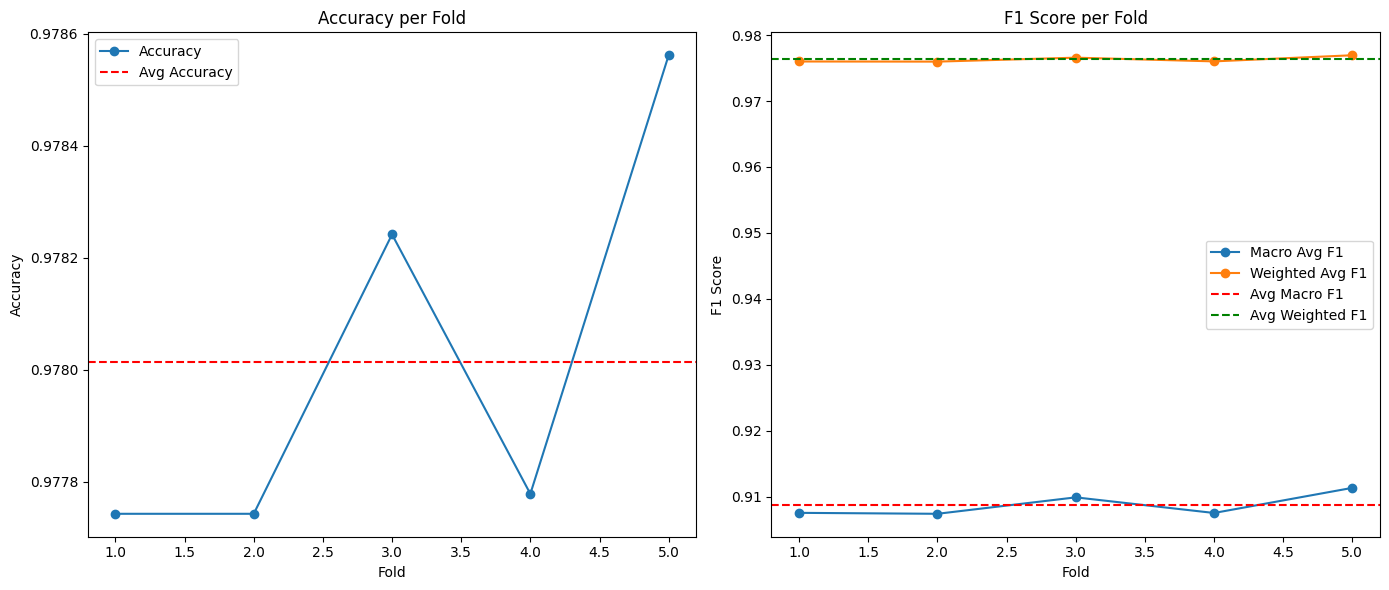


Fold 1 Results:

Fold 2 Results:

Fold 3 Results:

Fold 4 Results:

Fold 5 Results:


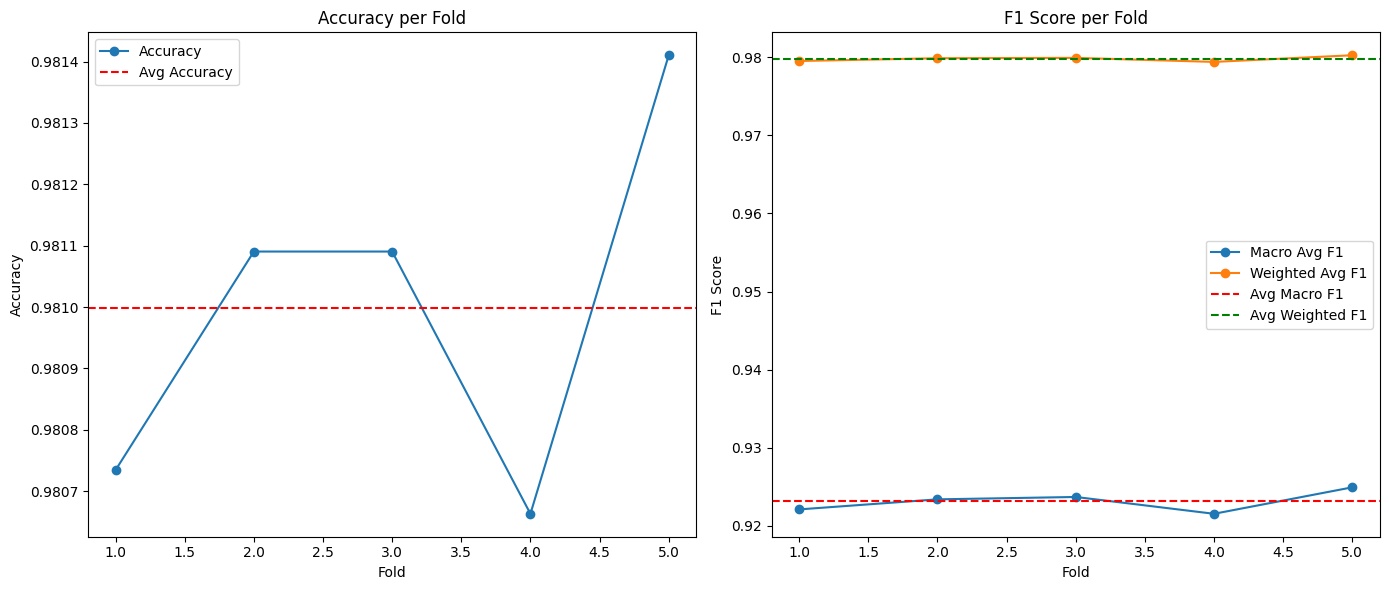


Fold 1 Results:

Fold 2 Results:

Fold 3 Results:

Fold 4 Results:

Fold 5 Results:


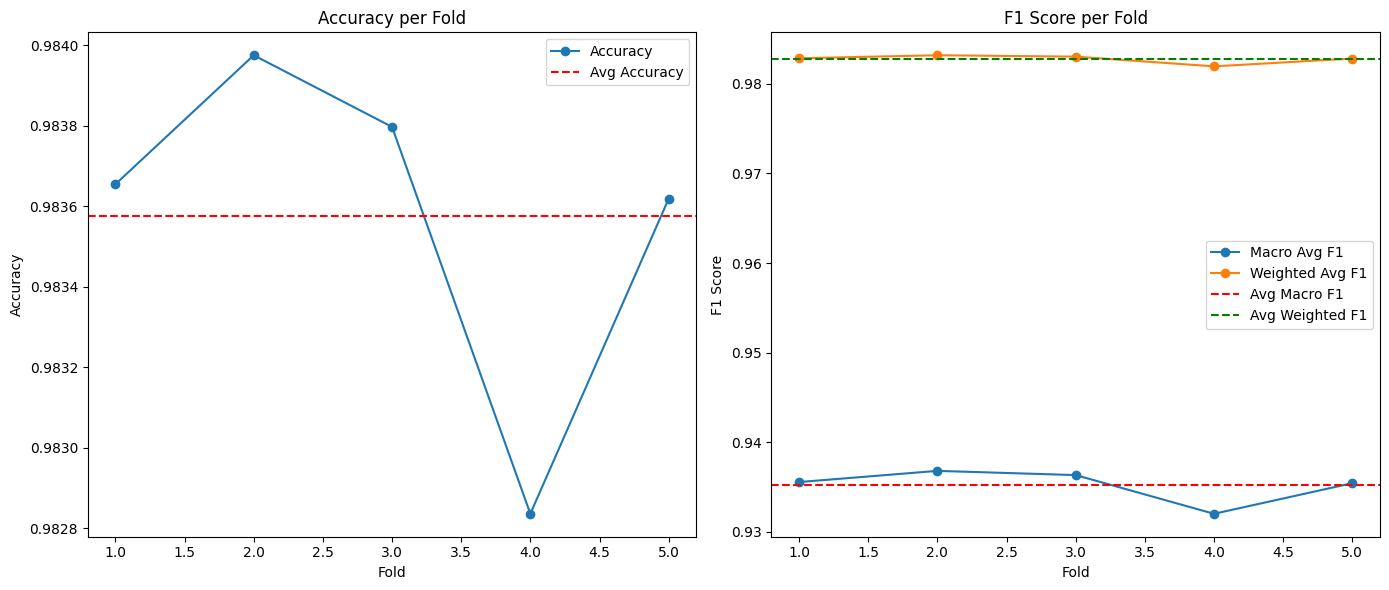


Fold 1 Results:

Fold 2 Results:

Fold 3 Results:

Fold 4 Results:

Fold 5 Results:


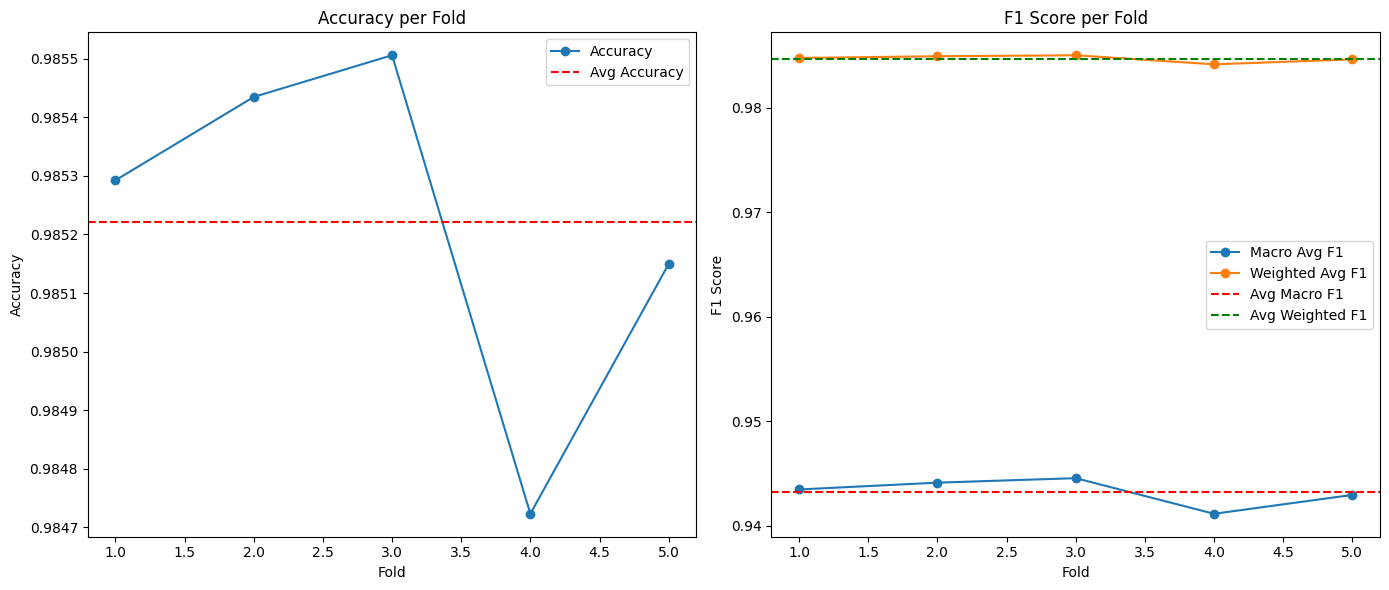


Fold 1 Results:

Fold 2 Results:

Fold 3 Results:

Fold 4 Results:

Fold 5 Results:


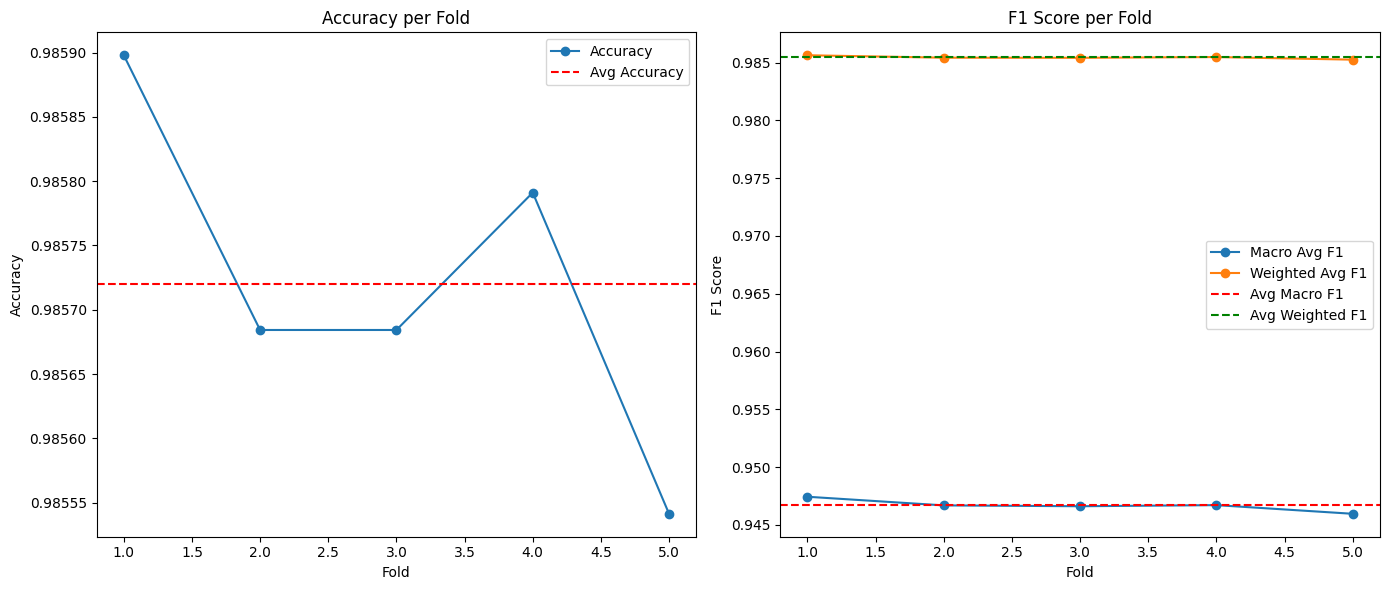


Fold 1 Results:

Fold 2 Results:

Fold 3 Results:

Fold 4 Results:

Fold 5 Results:


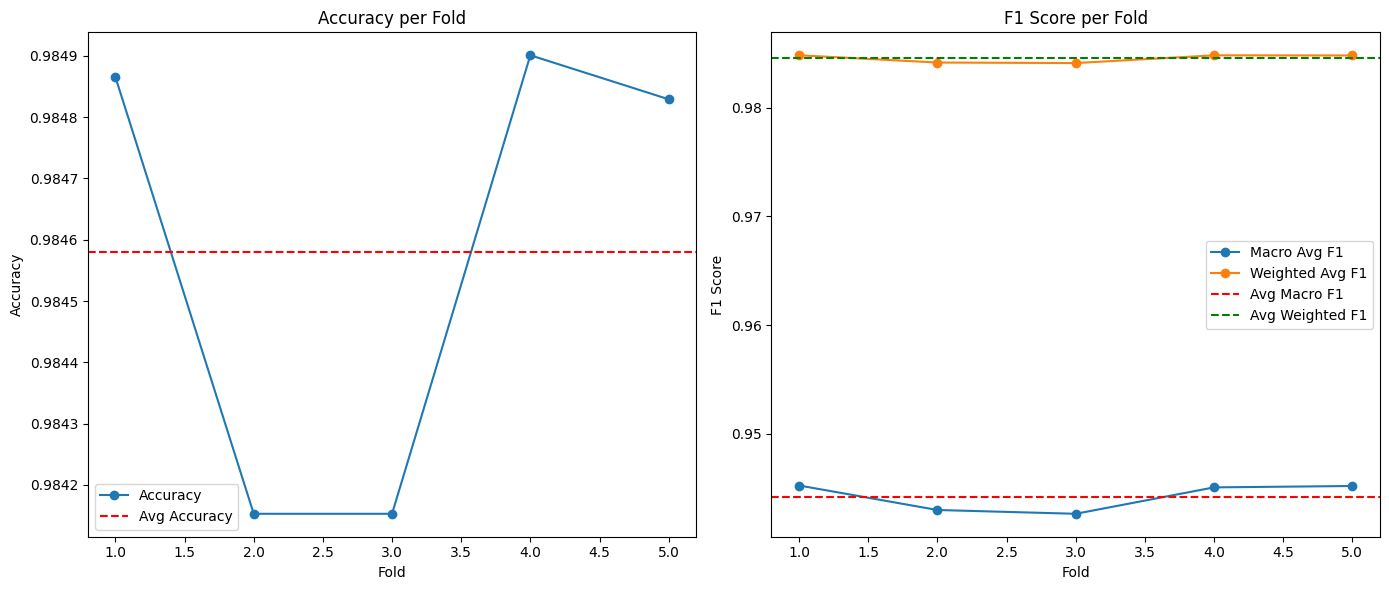


Fold 1 Results:

Fold 2 Results:

Fold 3 Results:

Fold 4 Results:

Fold 5 Results:


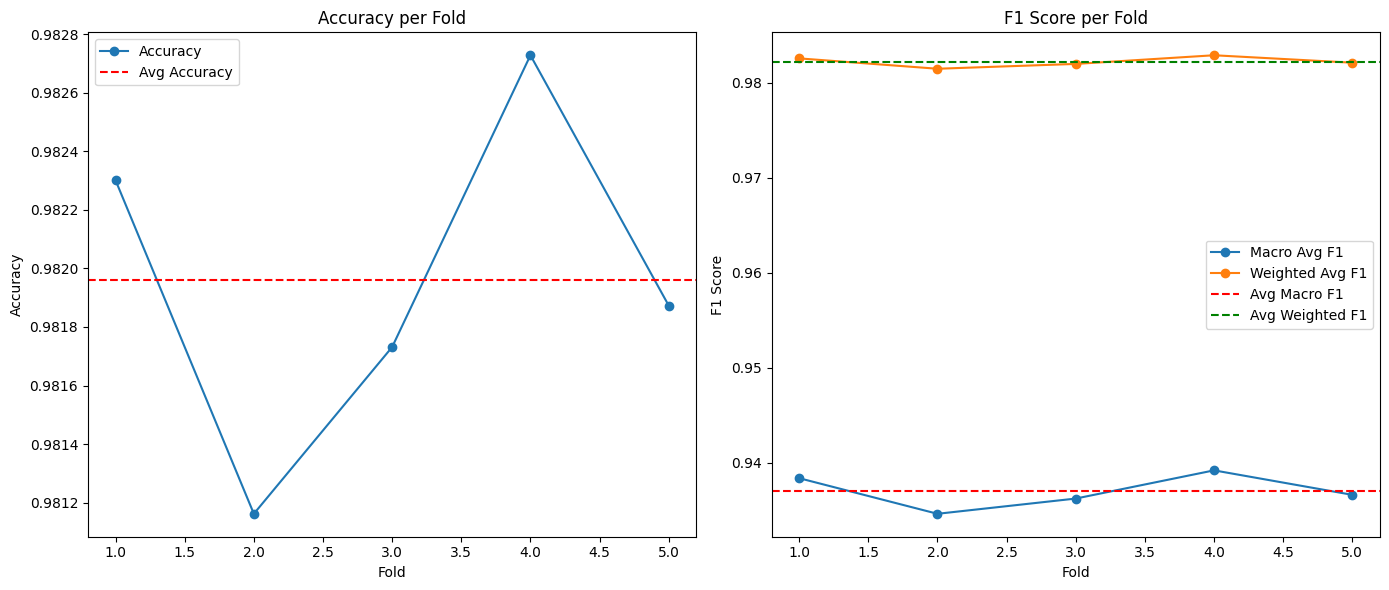


Fold 1 Results:

Fold 2 Results:

Fold 3 Results:

Fold 4 Results:

Fold 5 Results:


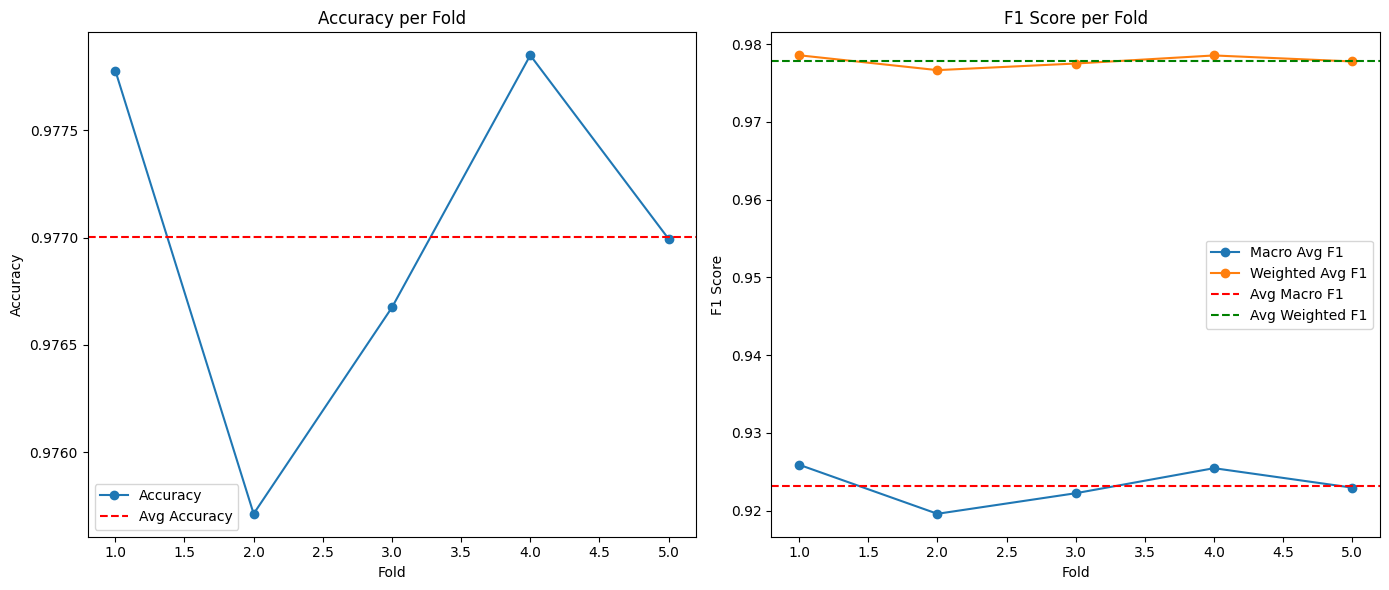


Fold 1 Results:

Fold 2 Results:

Fold 3 Results:

Fold 4 Results:

Fold 5 Results:


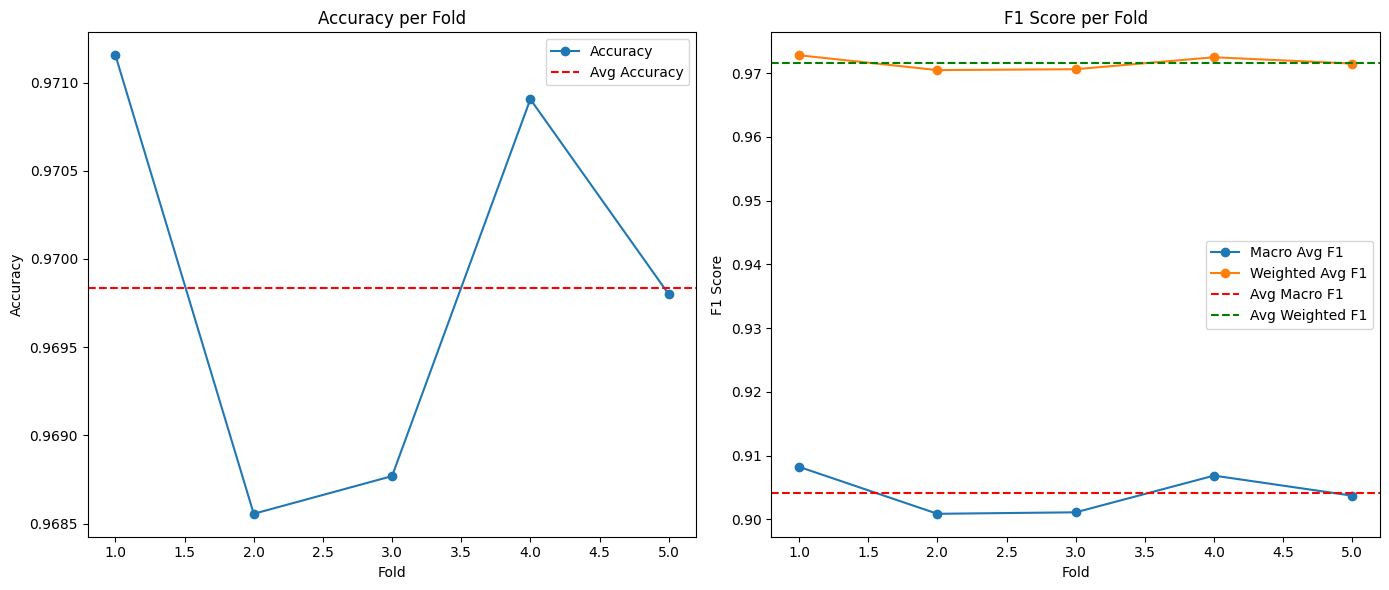


Fold 1 Results:

Fold 2 Results:

Fold 3 Results:

Fold 4 Results:

Fold 5 Results:


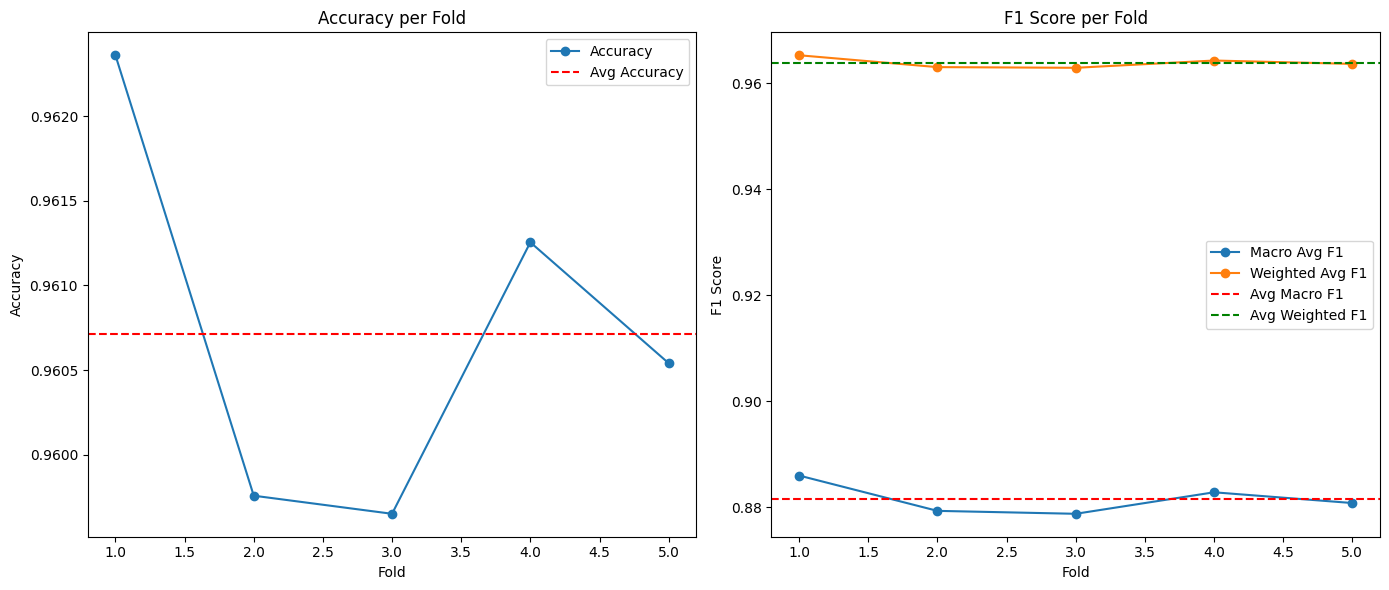


Fold 1 Results:

Fold 2 Results:

Fold 3 Results:

Fold 4 Results:

Fold 5 Results:


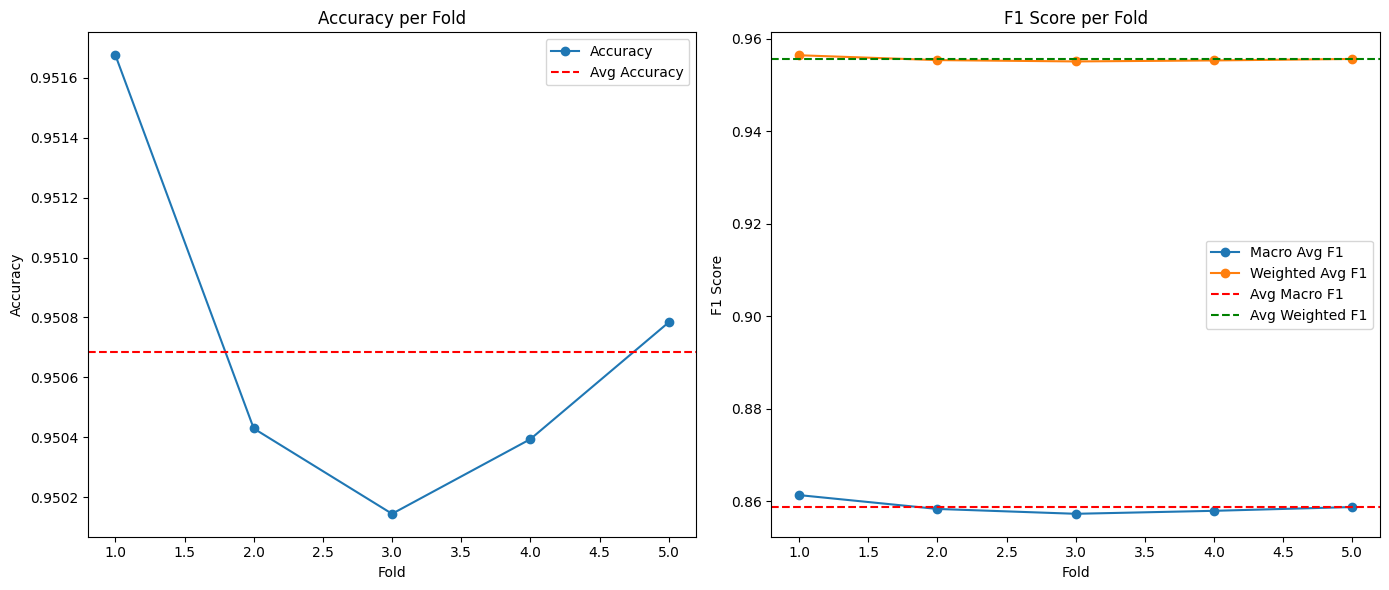


Fold 1 Results:

Fold 2 Results:

Fold 3 Results:

Fold 4 Results:

Fold 5 Results:


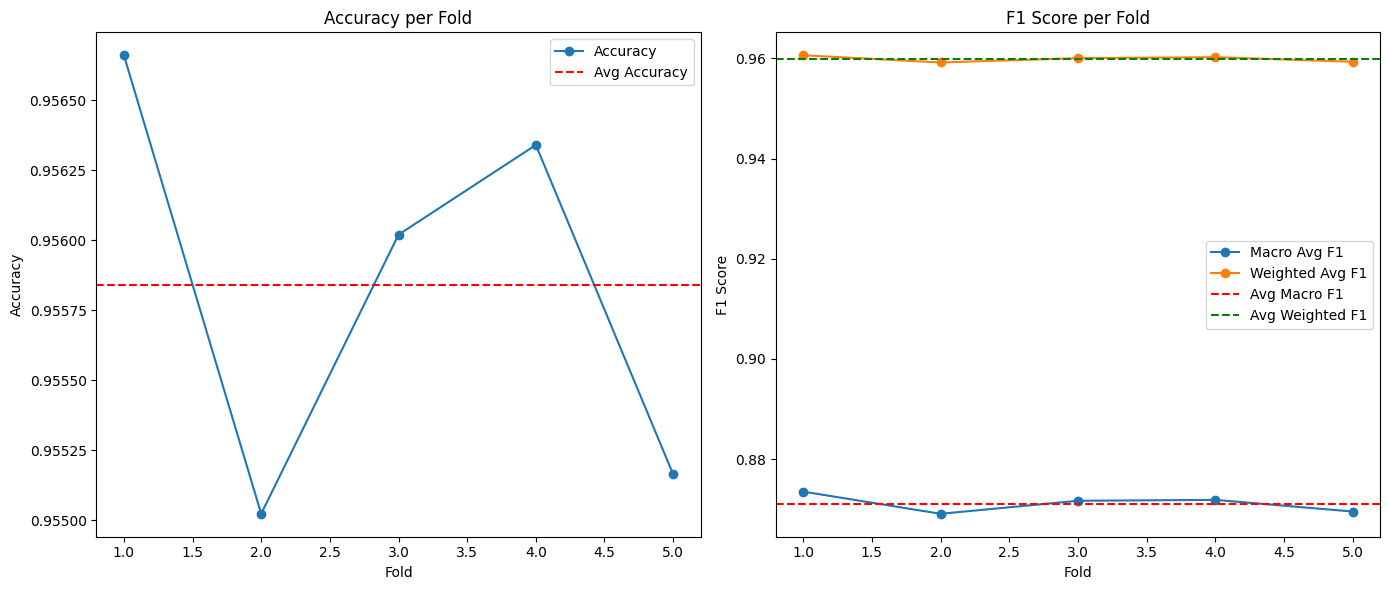


Fold 1 Results:

Fold 2 Results:

Fold 3 Results:

Fold 4 Results:

Fold 5 Results:


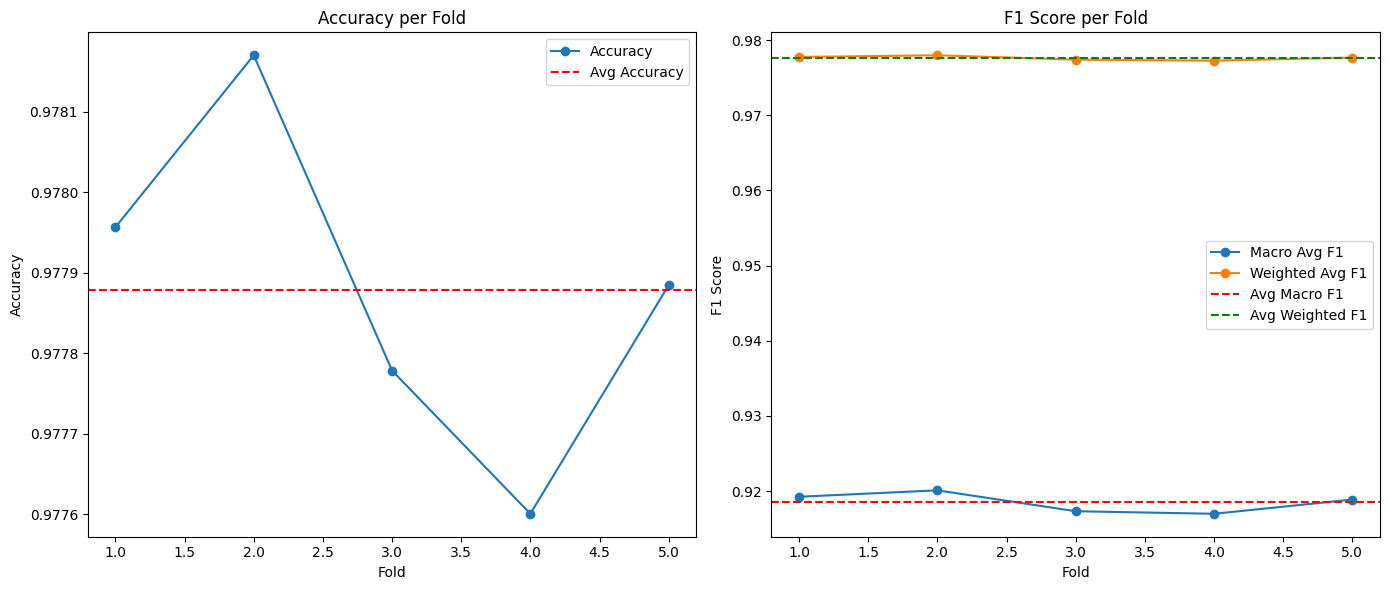

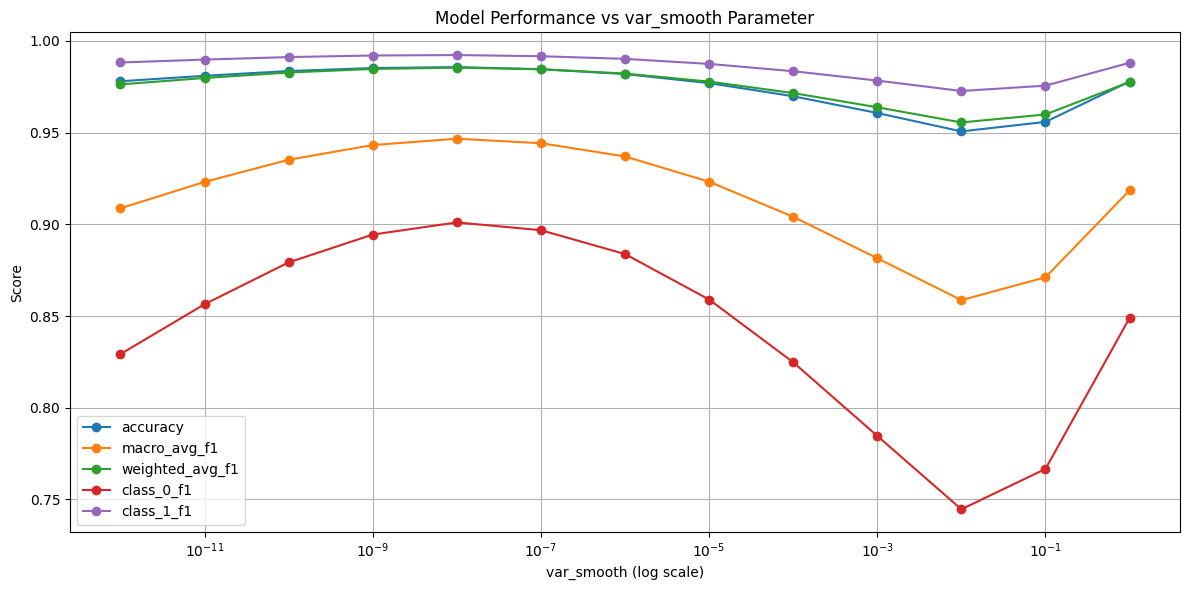


Best var_smooth values for each metric:
accuracy: 1.00e-08 (score: 0.986)
macro_avg_f1: 1.00e-08 (score: 0.947)
weighted_avg_f1: 1.00e-08 (score: 0.985)
class_0_f1: 1.00e-08 (score: 0.901)
class_1_f1: 1.00e-08 (score: 0.992)


In [ ]:
var_smooth_values = np.logspace(-12, 0, 13)  # Tests values from 1e-12 to 1

# Run the test
results_df = test_var_smooth_values(whole_X_train_preprocessed, whole_y_train, var_smooth_values)

# Print the best var_smooth value for each metric
print("\nBest var_smooth values for each metric:")
for metric in ['accuracy', 'macro_avg_f1', 'weighted_avg_f1', 'class_0_f1', 'class_1_f1']:
    best_idx = results_df[metric].idxmax()
    print(f"{metric}: {results_df.loc[best_idx, 'var_smooth']:.2e} "
          f"(score: {results_df.loc[best_idx, metric]:.3f})")

Best var_smoother is 1e-8.

## D. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `label` column.

Note: Adjust step 1 and 2 to your implementation of the preprocessing step if you don't use pipeline API from `sklearn`.

#### KNN

In [ ]:
import joblib

# Load model
loaded_model = joblib.load('knn_manhattan.joblib')

# Predict using the pipeline
test_sample = test[columns_to_keep]
predictions_test = loaded_model.predict(test_sample)

submission = pd.DataFrame({'id': test_sample['id'], 'label': predictions_test})
submission.to_csv('submission_knn.csv', index=False)

display(submission)

,id,label
0,48,1
1,68,1
2,76,1
3,155,1
4,167,1
...,...,...
9995,235694,0
9996,235718,1
9997,235733,0
9998,235740,1


#### Naive Bayes

In [64]:
from naive_bayes import GaussianNaiveBayes
from joblib import load
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

loaded_pipeline = load('naive_bayes_pipeline.joblib')

X_test_inputed = domain_imputer_pipeline.transform(test)
predictions_test = loaded_pipeline.predict(X_test_inputed)

submission = pd.DataFrame({'id': test['id'], 'label': predictions_test})
submission.to_csv('submission_bayes.csv', index=False)

display(submission.head())

,id,label
0,48,1
1,68,0
2,76,1
3,155,0
4,167,0


# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

My models perform better in predicting label 1 than label 0. See from scratch Naive Bayes, for example, we can observe recall and precision being 0.81 and 0.84 on label 0 while label 1 have 0.99 and 0.98. One of the factors behind this is because of the data imbalance between label 0 (7.5%) and label 1 (92%).

The label 1 is far more common to occur, thus:
- KNN: the k-nearest neighbor are more likely to contain majority class 1 samples
- GNB: the prior probability of class 1 is much higher, so the result is biased to the majority class.

In [ ]:
# Calculate label 0 and label 1 proportion in train
label_0_proportion = train_set['label'].value_counts(normalize=True)[0]
label_1_proportion = train_set['label'].value_counts(normalize=True)[1]

# Display
print("Label 0 proportion in train:", label_0_proportion)
print("Label 1 proportion in train:", label_1_proportion)